In [1]:
#%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as LA

N   = 20                                           #The number of pixels along a dimension of the image
A   = np.zeros((N, N))                             #The image
Adj = np.zeros((N*N,N*N))                          #Adjacency matrix

#Use 8 neighbors, and fill in the adjacency matrix
dx = [-1, 0, 1, -1, 1, -1, 0, 1];
dy = [-1, -1, -1, 0, 0, 1, 1, 1];
for x in range(1,N+1):
   for y in range(1 , N+1):
       index = (x-1)*N + y-1
       for ne in range(0, len(dx)):
           newx = x + dx[ne]
           newy = y + dy[ne]
           if newx > 0 and newx <= N and newy > 0 and newy <= N:
               index2 = (newx-1)*N + newy-1
               Adj[index, index2]= 1
           
#BELOW IS THE KEY CODE THAT COMPUTES THE SOLUTION TO THE DIFFERENTIAL EQUATION

Deg = np.diag(Adj.sum(axis=1))                 #compute the degree matrix
L = Deg - Adj;                                 #Compute the laplacian matrix in terms of the degree and adjacency matrices

In [3]:
#%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as LA

N   = 20                                           #The number of pixels along a dimension of the image
A   = np.zeros((N, N))                             #The image
Adj = np.zeros((N*N,N*N))                          #Adjacency matrix

#Use 8 neighbors, and fill in the adjacency matrix
dx = [-1, 0, 1, -1, 1, -1, 0, 1];
dy = [-1, -1, -1, 0, 0, 1, 1, 1];
for x in range(1,N+1):
   for y in range(1 , N+1):
       index = (x-1)*N + y-1
       for ne in range(0, len(dx)):
           newx = x + dx[ne]
           newy = y + dy[ne]
           if newx > 0 and newx <= N and newy > 0 and newy <= N:
               index2 = (newx-1)*N + newy-1
               Adj[index, index2]= 1
                


In [4]:
import networkx as nx

def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D

#BELOW IS THE KEY CODE THAT COMPUTES THE SOLUTION TO THE DIFFERENTIAL EQUATION

Deg = np.diag(Adj.sum(axis=1))                 #compute the degree matrix
L1 = Deg - Adj;                                 #Compute the laplacian matrix in terms of the degree and adjacency matrices
D, V =LA.eigh(L1);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')
L1

array([[ 3., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  5., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  5., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  5., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  5., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  3.]])

In [2]:
import networkx as nx

def genlaplacian_M(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -(1.0/pow(x,D[i,j]))
            D[i,i] = -1*(D[i].sum())
    return D

In [3]:
import networkx as nx

def genlaplacian_L(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -(np.exp(-x*D[i,j]))
            D[i,i] = -1*(D[i].sum())
    return D

In [7]:

from scipy import io
from scipy import sparse
import networkx as nx

#G = nx.from_scipy_sparse_matrix( sparse.csr_matrix(Adj))
#draw_adjacency_matrix(G)
x=0.1
nodelist= [range(0,400)]
G = nx.Graph(Adj)
L = genlaplacian(G,x)
D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')

#Initial condition (place a few large positive values around and make everything else zero)
C0 =np.zeros((N,N))
C0[1:5, 1:5]  = 5
C0[9:15,9:15] = 10
C0[1:5, 7:13] = 7
C0 = np.reshape(C0,(N*N,1), order='F');

C0V = np.dot((V.conj().transpose()),C0)                      #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
fig = plt.figure()                
for t in np.arange(0,5.05,0.05):                             #Loop through times and decay each initial component
    Phi = (C0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);                                     #Transform from eigenvector coordinate system to original coordinate system
    Phi =  np.reshape(Phi, (N, N), order='F')                #shape phi to a lattice shape
    imgplot = plt.imshow(Phi, cmap="jet")                    # plot image from array
    plt.clim(0,10)                                           #set colour axis
    plt.title('Diffusion t='+str(t))                         # set tittle
    plt.savefig("./diffusion-lattice-x0.1/img"+str(t*100)+'.png')   #save image at each time step


#### L

In [91]:

from scipy import io
from scipy import sparse
import networkx as nx

#G = nx.from_scipy_sparse_matrix( sparse.csr_matrix(Adj))
#draw_adjacency_matrix(G)
x=0.2
nodelist= [range(0,400)]
G = nx.Graph(Adj)
L = genlaplacian(G,x)
D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')

#Initial condition (place a few large positive values around and make everything else zero)
C0 =np.zeros((N,N))
C0[1:5, 1:5]  = 5
C0[9:15,9:15] = 10
C0[1:5, 7:13] = 7
C0 = np.reshape(C0,(N*N,1), order='F');

C0V = np.dot((V.conj().transpose()),C0)                      #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
fig = plt.figure()                
for t in np.arange(0,5.05,0.05):                             #Loop through times and decay each initial component
    Phi = (C0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);                                     #Transform from eigenvector coordinate system to original coordinate system
    Phi =  np.reshape(Phi, (N, N), order='F')                #shape phi to a lattice shape
    imgplot = plt.imshow(Phi, cmap="jet")                    # plot image from array
    plt.clim(0,10)                                           #set colour axis
    plt.title('Diffusion t='+str(t))                     # set tittle
    plt.savefig("./diffusion-lattice-x0.2/img"+str(t*100)+'.png')                     #save image at each time step


In [11]:

from scipy import io
from scipy import sparse
import networkx as nx

#G = nx.from_scipy_sparse_matrix( sparse.csr_matrix(Adj))
#draw_adjacency_matrix(G)
x=2
nodelist= [range(0,400)]
G = nx.Graph(Adj)
L = genlaplacian_M(G,x)
D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')

#Initial condition (place a few large positive values around and make everything else zero)
C0 =np.zeros((N,N))
C0[1:5, 1:5]  = 5
C0[9:15,9:15] = 10
C0[1:5, 7:13] = 7
C0 = np.reshape(C0,(N*N,1), order='F');

C0V = np.dot((V.conj().transpose()),C0)                      #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
fig = plt.figure()                
for t in np.arange(0,5.05,0.05):                             #Loop through times and decay each initial component
    Phi = (C0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);                                     #Transform from eigenvector coordinate system to original coordinate system
    Phi =  np.reshape(Phi, (N, N), order='F')                #shape phi to a lattice shape
    imgplot = plt.imshow(Phi, cmap="jet")                    # plot image from array
    plt.clim(0,10)                                           #set colour axis
    plt.title('Diffusion t='+str(t))                     # set tittle
    plt.savefig("./diffusion-lattice-x2/img"+str(t*100)+'.png')                     #save image at each time step

In [2]:
import networkx as nx
import numpy as np
from scipy.linalg import expm

G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4)])

L =nx.laplacian_matrix(G).todense()
phi_0 = np.matrix([3.0,0.0,8.0,0.0])
t=1
phi_t = np.dot(phi_0,expm(-L*1*t))
print(phi_t)

[[ 2.56006074  2.75851388  3.07982432  2.60160105]]


In [4]:
from scipy import io
from scipy import sparse
import networkx as nx

#G = nx.from_scipy_sparse_matrix( sparse.csr_matrix(Adj))
#draw_adjacency_matrix(G)
x=1.0
nodelist= [range(0,400)]
G = nx.Graph(Adj)
L = genlaplacian_M(G,x)
D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')

#Initial condition (place a few large positive values around and make everything else zero)
C0 =np.zeros((N,N))
C0[1:5, 1:5]  = 5
C0[9:15,9:15] = 10
C0[1:5, 7:13] = 7
C0 = np.reshape(C0,(N*N,1), order='F');

C0V = np.dot((V.conj().transpose()),C0)                      #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
fig = plt.figure()                
for t in np.arange(0,5.05,0.05):                             #Loop through times and decay each initial component
    Phi = (C0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);                                     #Transform from eigenvector coordinate system to original coordinate system
    Phi =  np.reshape(Phi, (N, N), order='F')                #shape phi to a lattice shape
    imgplot = plt.imshow(Phi, cmap="jet")                    # plot image from array
    plt.clim(0,10)                                           #set colour axis
    plt.title('Diffusion t='+str(t))                     # set tittle
    plt.savefig("./diffusion-lattice-Mellin-x1/img"+str(t*100)+'.png') 

In [16]:
from scipy import io
from scipy import sparse
import networkx as nx

#G = nx.from_scipy_sparse_matrix( sparse.csr_matrix(Adj))
#draw_adjacency_matrix(G)
x=0.1
nodelist= [range(0,400)]
G = nx.Graph(Adj)
L = genlaplacian_M(G,x)
D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')

#Initial condition (place a few large positive values around and make everything else zero)
C0 =np.zeros((N,N))
C0[1:5, 1:5]  = 5
C0[9:15,9:15] = 10
C0[1:5, 7:13] = 7
C0 = np.reshape(C0,(N*N,1), order='F');

C0V = np.dot((V.conj().transpose()),C0)                      #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
fig = plt.figure()                
for t in np.arange(0,5.05,0.05):                             #Loop through times and decay each initial component
    Phi = (C0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);                                     #Transform from eigenvector coordinate system to original coordinate system
    Phi =  np.reshape(Phi, (N, N), order='F')                #shape phi to a lattice shape
    imgplot = plt.imshow(Phi, cmap="jet")                    # plot image from array
    plt.clim(0,10)                                           #set colour axis
    plt.title('Diffusion t='+str(t))                     # set tittle
    plt.savefig("./diffusion-lattice-Mellin-x01/img"+str(t*100)+'.png') 

In [18]:
from scipy import io
from scipy import sparse
import networkx as nx

#G = nx.from_scipy_sparse_matrix( sparse.csr_matrix(Adj))
#draw_adjacency_matrix(G)
x=0.01
nodelist= [range(0,400)]
G = nx.Graph(Adj)
L = genlaplacian_M(G,x)
D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')

#Initial condition (place a few large positive values around and make everything else zero)
C0 =np.zeros((N,N))
C0[1:5, 1:5]  = 5
C0[9:15,9:15] = 10
C0[1:5, 7:13] = 7
C0 = np.reshape(C0,(N*N,1), order='F');

C0V = np.dot((V.conj().transpose()),C0)                      #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
fig = plt.figure()                
for t in np.arange(0,5.05,0.05):                             #Loop through times and decay each initial component
    Phi = (C0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);                                     #Transform from eigenvector coordinate system to original coordinate system
    Phi =  np.reshape(Phi, (N, N), order='F')                #shape phi to a lattice shape
    imgplot = plt.imshow(Phi, cmap="jet")                    # plot image from array
    plt.clim(0,10)                                           #set colour axis
    plt.title('Diffusion t='+str(t))                     # set tittle
    plt.savefig("./diffusion-lattice-Mellin-x001/img"+str(t*100)+'.png') 

/usr/lib/python3/dist-packages/ipykernel/__main__.py:26: RuntimeWarning: overflow encountered in exp


In [7]:
from scipy import io
from scipy import sparse
import networkx as nx

#G = nx.from_scipy_sparse_matrix( sparse.csr_matrix(Adj))
#draw_adjacency_matrix(G)
x=1
nodelist= [range(0,400)]
G = nx.Graph(Adj)
L = genlaplacian_L(G,x)
D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')

#Initial condition (place a few large positive values around and make everything else zero)
C0 =np.zeros((N,N))
C0[1:5, 1:5]  = 5
C0[9:15,9:15] = 10
C0[1:5, 7:13] = 7
C0 = np.reshape(C0,(N*N,1), order='F');

C0V = np.dot((V.conj().transpose()),C0)                      #Transform the initial condition into the coordinate system of the eigenvectors

#plotting results
fig = plt.figure()                
for t in np.arange(0,5.05,0.05):                             #Loop through times and decay each initial component
    Phi = (C0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);                                     #Transform from eigenvector coordinate system to original coordinate system
    Phi =  np.reshape(Phi, (N, N), order='F')                #shape phi to a lattice shape
    imgplot = plt.imshow(Phi, cmap="jet")                    # plot image from array
    plt.clim(0,10)                                           #set colour axis
    plt.title('Diffusion t='+str(t))                     # set tittle
    plt.savefig("./diffusion-lattice-Laplace-x1/img"+str(t*100)+'.png') 

In [7]:
%matplotlib qt5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()


In [4]:
#%matplotlib inline
%matplotlib qt5
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as LA
import matplotlib.animation as animation

N   = 20                                           #The number of pixels along a dimension of the image
A   = np.zeros((N, N))                             #The image
Adj = np.zeros((N*N,N*N))                          #Adjacency matrix

#Use 8 neighbors, and fill in the adjacency matrix
dx = [-1, 0, 1, -1, 1, -1, 0, 1];
dy = [-1, -1, -1, 0, 0, 1, 1, 1];
for x in range(1,N+1):
   for y in range(1 , N+1):
       index = (x-1)*N + y-1
       for ne in range(0, len(dx)):
           newx = x + dx[ne]
           newy = y + dy[ne]
           if newx > 0 and newx <= N and newy > 0 and newy <= N:
               index2 = (newx-1)*N + newy-1
               Adj[index, index2]= 1
           
#BELOW IS THE KEY CODE THAT COMPUTES THE SOLUTION TO THE DIFFERENTIAL EQUATION

Deg = np.diag(Adj.sum(axis=1))                 #compute the degree matrix
L = Deg - Adj;                                 #Compute the laplacian matrix in terms of the degree and adjacency matrices
D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')


#Initial condition (place a few large positive values around and make everything else zero)
C0 =np.zeros((N,N))
C0[1:5, 1:5]  = 5
C0[9:15,9:15] = 10
C0[1:5, 7:13] = 7
C0 = np.reshape(C0,(N*N,1), order='F');

C0V = np.dot((V.conj().transpose()),C0) #Transform the initial condition into the coordinate system of the eigenvectors

-

<IPython.core.display.Javascript object>


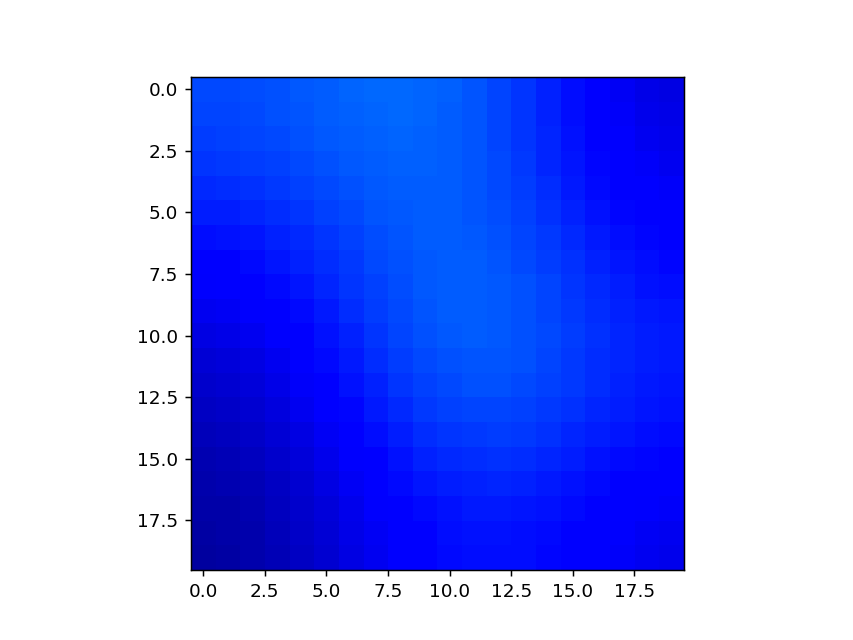

In [7]:
%matplotlib notebook
#%matplotlib qt5
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as LA
import matplotlib.animation as animation

N   = 20                                           #The number of pixels along a dimension of the image
A   = np.zeros((N, N))                             #The image
Adj = np.zeros((N*N,N*N))                          #Adjacency matrix

#Use 8 neighbors, and fill in the adjacency matrix
dx = [-1, 0, 1, -1, 1, -1, 0, 1];
dy = [-1, -1, -1, 0, 0, 1, 1, 1];
for x in range(1,N+1):
   for y in range(1 , N+1):
       index = (x-1)*N + y-1
       for ne in range(0, len(dx)):
           newx = x + dx[ne]
           newy = y + dy[ne]
           if newx > 0 and newx <= N and newy > 0 and newy <= N:
               index2 = (newx-1)*N + newy-1
               Adj[index, index2]= 1
           
#BELOW IS THE KEY CODE THAT COMPUTES THE SOLUTION TO THE DIFFERENTIAL EQUATION

Deg = np.diag(Adj.sum(axis=1))                 #compute the degree matrix
L = Deg - Adj;                                 #Compute the laplacian matrix in terms of the degree and adjacency matrices
D, V =LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
D = np.reshape(D,(N*N,1), order='F')


#Initial condition (place a few large positive values around and make everything else zero)
C0 =np.zeros((N,N))
C0[1:5, 1:5]  = 5
C0[9:15,9:15] = 10
C0[1:5, 7:13] = 7
C0 = np.reshape(C0,(N*N,1), order='F');

C0V = np.dot((V.conj().transpose()),C0) #Transform the initial condition into the coordinate system of the eigenvectors

fig = plt.figure() 

ims = []
for t in np.arange(0, 10.05, 0.05):
    Phi = (C0V* (np.exp(-D*t)));                             #Exponential decay for each component
    Phi = np.dot(V,Phi);                                     #Transform from eigenvector coordinate system to original coordinate system
    Phi =  np.reshape(Phi, (N, N), order='F') 
    im  = plt.imshow(Phi, cmap='jet', animated=True)
    plt.clim(0,10)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True)
plt.show()

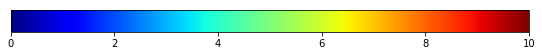

In [13]:
#import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

a = np.array([[0,10]])
pl.figure(figsize=(9, 0.5))
img = pl.imshow(a, cmap="jet")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax)
pl.show()